Метод опорных векторов

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

In [ ]:
print(faces.images[0].shape)

(64, 64)


In [ ]:
print(faces.data[0].shape)

(4096,)


In [ ]:
print(faces.target[0].size)

1


In [ ]:
print(faces.images[0])

[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


In [ ]:
print(faces.data[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


In [ ]:
print(faces.target[0])

0


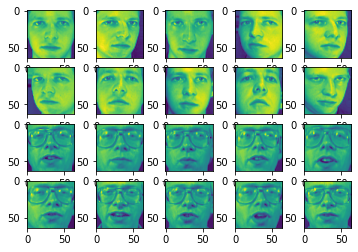

In [ ]:
import matplotlib.pyplot as plt

images = faces.images 

features = faces.data 
targets = faces.target 

fig = plt.figure() 
for i in range(20): 
    img_grid = fig.add_subplot(4, 5, i+1)
    img_grid.imshow(images[i])

plt.show()

Время обучения: 0.15957880020141602

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.9875
Precision for test data  0.9916666666666668
Recall for test data 0.9875




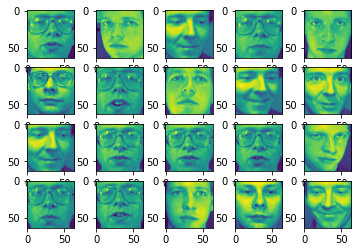

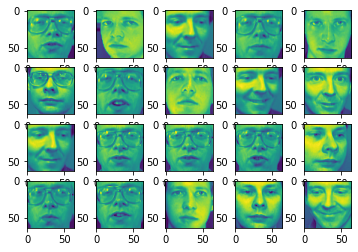

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

def plot_images(images, total_images=20, rows=4, cols=5):
    fig = plt.figure() 
    for i in range(total_images):
        img_grid = fig.add_subplot(rows, cols, i+1)
        img_grid.imshow(images[i])

t0 = time.time()

images = faces.images

features = faces.data 
targets = faces.target 


train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=23,
        stratify=targets
    )

classifier = SVC(kernel="linear")
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

faces_test = []
for i in test_targets:
    faces_test.append(images[i])

faces_predict = []
for i in prediction_test_targets:
    faces_predict.append(images[i])

plot_images(faces_test, total_images=20)
print()
plot_images(faces_predict, total_images=20)
plt.show()

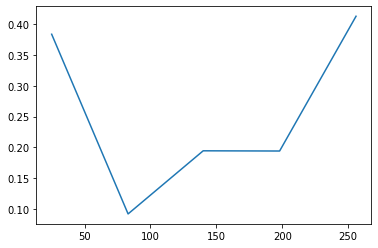

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, train_features, train_targets, return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.show()

Гауссово ядро

Время обучения: 0.2634556293487549

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.9625
Precision for test data  0.9708333333333332
Recall for test data 0.9625




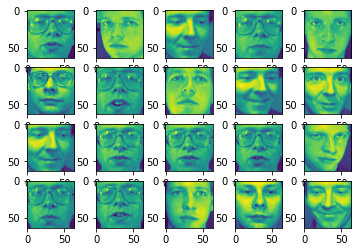

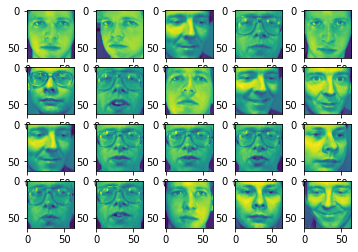

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

def plot_images(images, total_images=20, rows=4, cols=5):
    fig = plt.figure() 
    for i in range(total_images):
        img_grid = fig.add_subplot(rows, cols, i+1)
        img_grid.imshow(images[i])

t0 = time.time()

images = faces.images

features = faces.data 
targets = faces.target 


train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=23,
        stratify=targets
    )

classifier = SVC(kernel="rbf")
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

faces_test = []
for i in test_targets:
    faces_test.append(images[i])

faces_predict = []
for i in prediction_test_targets:
    faces_predict.append(images[i])

plot_images(faces_test, total_images=20)
print()
plot_images(faces_predict, total_images=20)
plt.show()

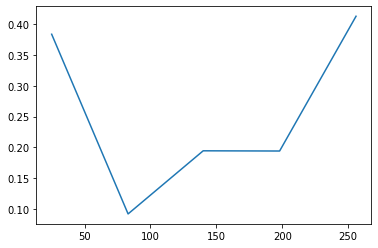

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, train_features, train_targets, return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.show()

Логистическая регрессия

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Время обучения: 3.5105879306793213

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.975
Precision for test data  0.9833333333333332
Recall for test data 0.975




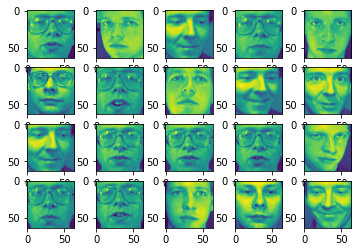

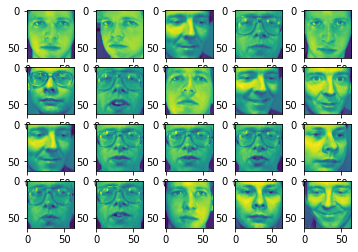

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

def plot_images(images, total_images=20, rows=4, cols=5):
    fig = plt.figure() 
    for i in range(total_images):
        img_grid = fig.add_subplot(rows, cols, i+1)
        img_grid.imshow(images[i])

t0 = time.time()

images = faces.images

features = faces.data 
targets = faces.target 


train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=23,
        stratify=targets
    )

classifier = LogisticRegression(C = 500)
classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

faces_test = []
for i in test_targets:
    faces_test.append(images[i])

faces_predict = []
for i in prediction_test_targets:
    faces_predict.append(images[i])

plot_images(faces_test, total_images=20)
print()
plot_images(faces_predict, total_images=20)
plt.show()

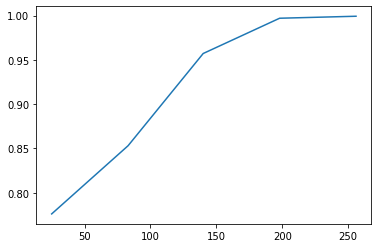

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

estimator = SVC(gamma=0.01)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, train_features, train_targets, return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.show()

Многослойный перцептрон

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Время обучения: 9.676050662994385

Accuracy for training data 0.94375
Precision for training data  0.953440170940171
Recall for training data 0.94375

Accuracy for test data: 0.8375
Precision for test data  0.8958333333333333
Recall for test data 0.8375




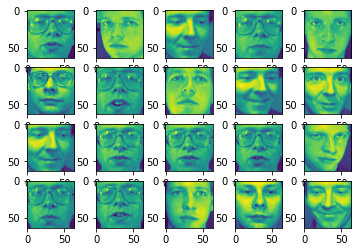

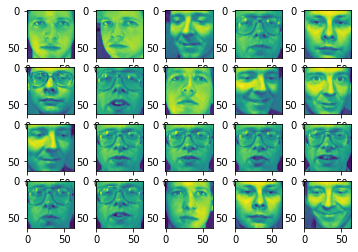

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

def plot_images(images, total_images=20, rows=4, cols=5):
    fig = plt.figure() 
    for i in range(total_images):
        img_grid = fig.add_subplot(rows, cols, i+1)
        img_grid.imshow(images[i])

t0 = time.time()

images = faces.images

features = faces.data 
targets = faces.target 


train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=23,
        stratify=targets
    )

classifier = MLPClassifier(hidden_layer_sizes = (300,),learning_rate='constant', solver = 'sgd',momentum = 0.9,n_iter_no_change = 20)

classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

faces_test = []
for i in test_targets:
    faces_test.append(images[i])

faces_predict = []
for i in prediction_test_targets:
    faces_predict.append(images[i])

plot_images(faces_test, total_images=20)
print()
plot_images(faces_predict, total_images=20)
plt.show()

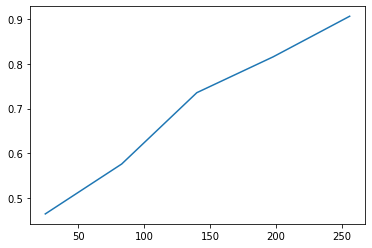

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

estimator = KNeighborsClassifier()

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, train_features, train_targets, return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.show()

DecisionTreeClassifier

Время обучения: 2.7520406246185303

Accuracy for training data 1.0
Precision for training data  1.0
Recall for training data 1.0

Accuracy for test data: 0.625
Precision for test data  0.6527380952380952
Recall for test data 0.625



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


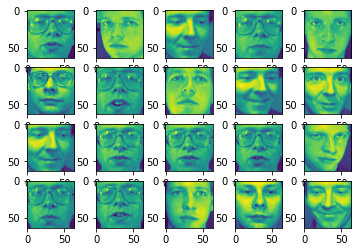

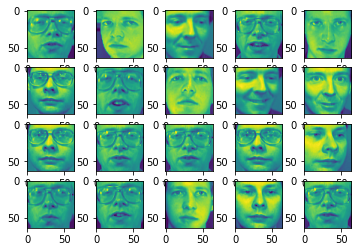

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

def plot_images(images, total_images=20, rows=4, cols=5):
    fig = plt.figure() 
    for i in range(total_images):
        img_grid = fig.add_subplot(rows, cols, i+1)
        img_grid.imshow(images[i])

t0 = time.time()

images = faces.images

features = faces.data 
targets = faces.target 


train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=23,
        stratify=targets
    )

classifier = DecisionTreeClassifier()

classifier.fit(train_features, train_targets) 

t1 = time.time()
print("Время обучения:", t1 - t0)
print()

prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
self_precision = precision_score(train_targets, prediction_training_targets, average='weighted')
self_recall = recall_score(train_targets, prediction_training_targets, average='weighted')
print("Accuracy for training data", self_accuracy)
print("Precision for training data ", self_precision)
print("Recall for training data", self_recall)

print()

prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
test_precision = precision_score(test_targets, prediction_test_targets, average='weighted')
test_recall = recall_score(test_targets, prediction_test_targets, average='weighted')
print("Accuracy for test data:", test_accuracy)
print("Precision for test data ", test_precision)
print("Recall for test data", test_recall)

print()

faces_test = []
for i in test_targets:
    faces_test.append(images[i])

faces_predict = []
for i in prediction_test_targets:
    faces_predict.append(images[i])

plot_images(faces_test, total_images=20)
print()
plot_images(faces_predict, total_images=20)
plt.show()

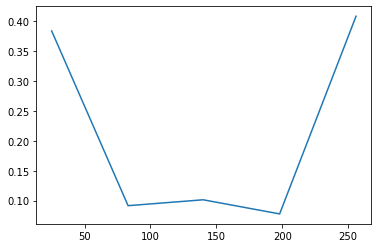

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

estimator = SVC(gamma=0.0002)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, train_features, train_targets, return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.show()